<a href="https://colab.research.google.com/github/BIVIN-KANNAN/Ybi-Foundation-Internship/blob/main/Ybi_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mileage Prediction**

-------------

## **Objective**

Develop a model to predict the fuel efficiency (mpg) of a vehicle based on its characteristics, such as cylinders, displacement, horsepower, weight, acceleration, model_year, and origin. A regression model that can estimate mpg for vehicles with given features.

## **Data Source**

YBI-Foundation/Dataset - GitHub

## **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [ ]:
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


## **Describe Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
data.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


In [ ]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## **Data Visualization**

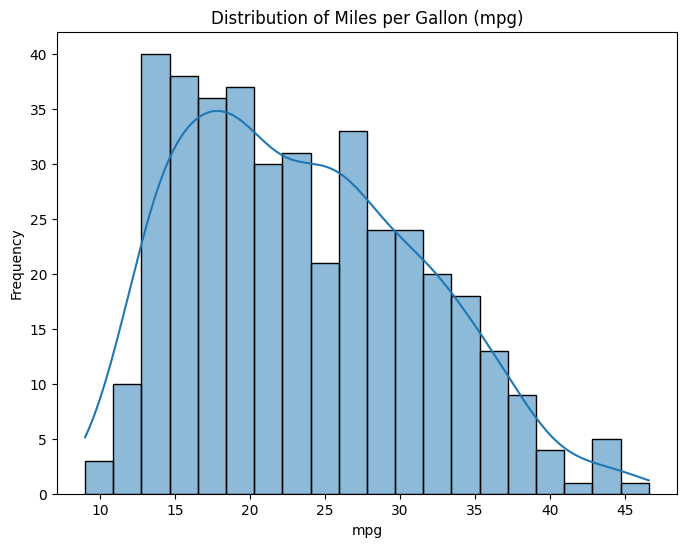

In [ ]:
#  Distribution of mpg (Miles per Gallon)
plt.figure(figsize=(8, 6))
sns.histplot(data['mpg'], bins=20, kde=True)
plt.title('Distribution of Miles per Gallon (mpg)')
plt.xlabel('mpg')
plt.ylabel('Frequency')
plt.show()

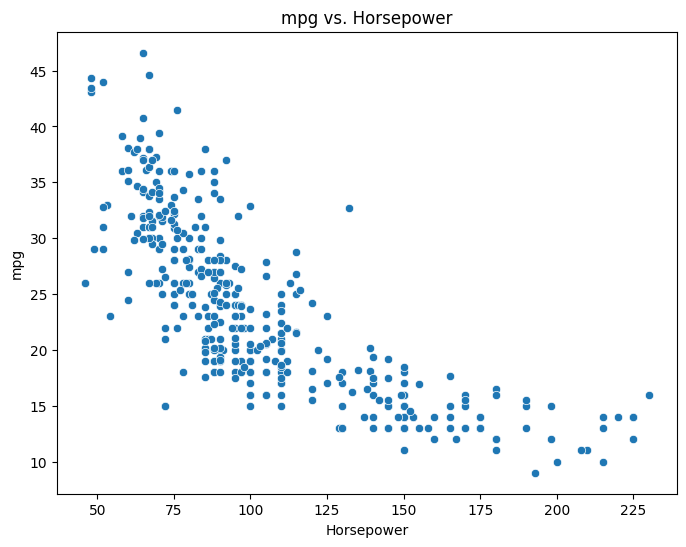

In [ ]:
# Scatter plot between mpg and horsepower
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='mpg', data=data)
plt.title('mpg vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.show()

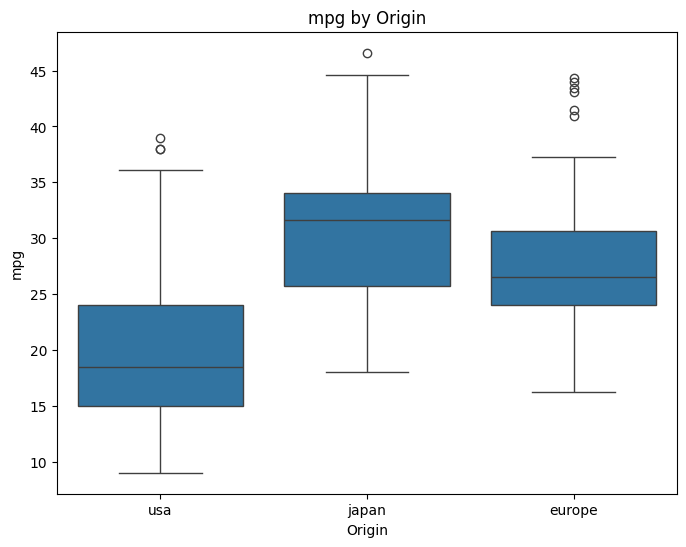

In [ ]:
#  Boxplot of mpg by origin
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=data)
plt.title('mpg by Origin')
plt.xlabel('Origin')
plt.ylabel('mpg')
plt.show()

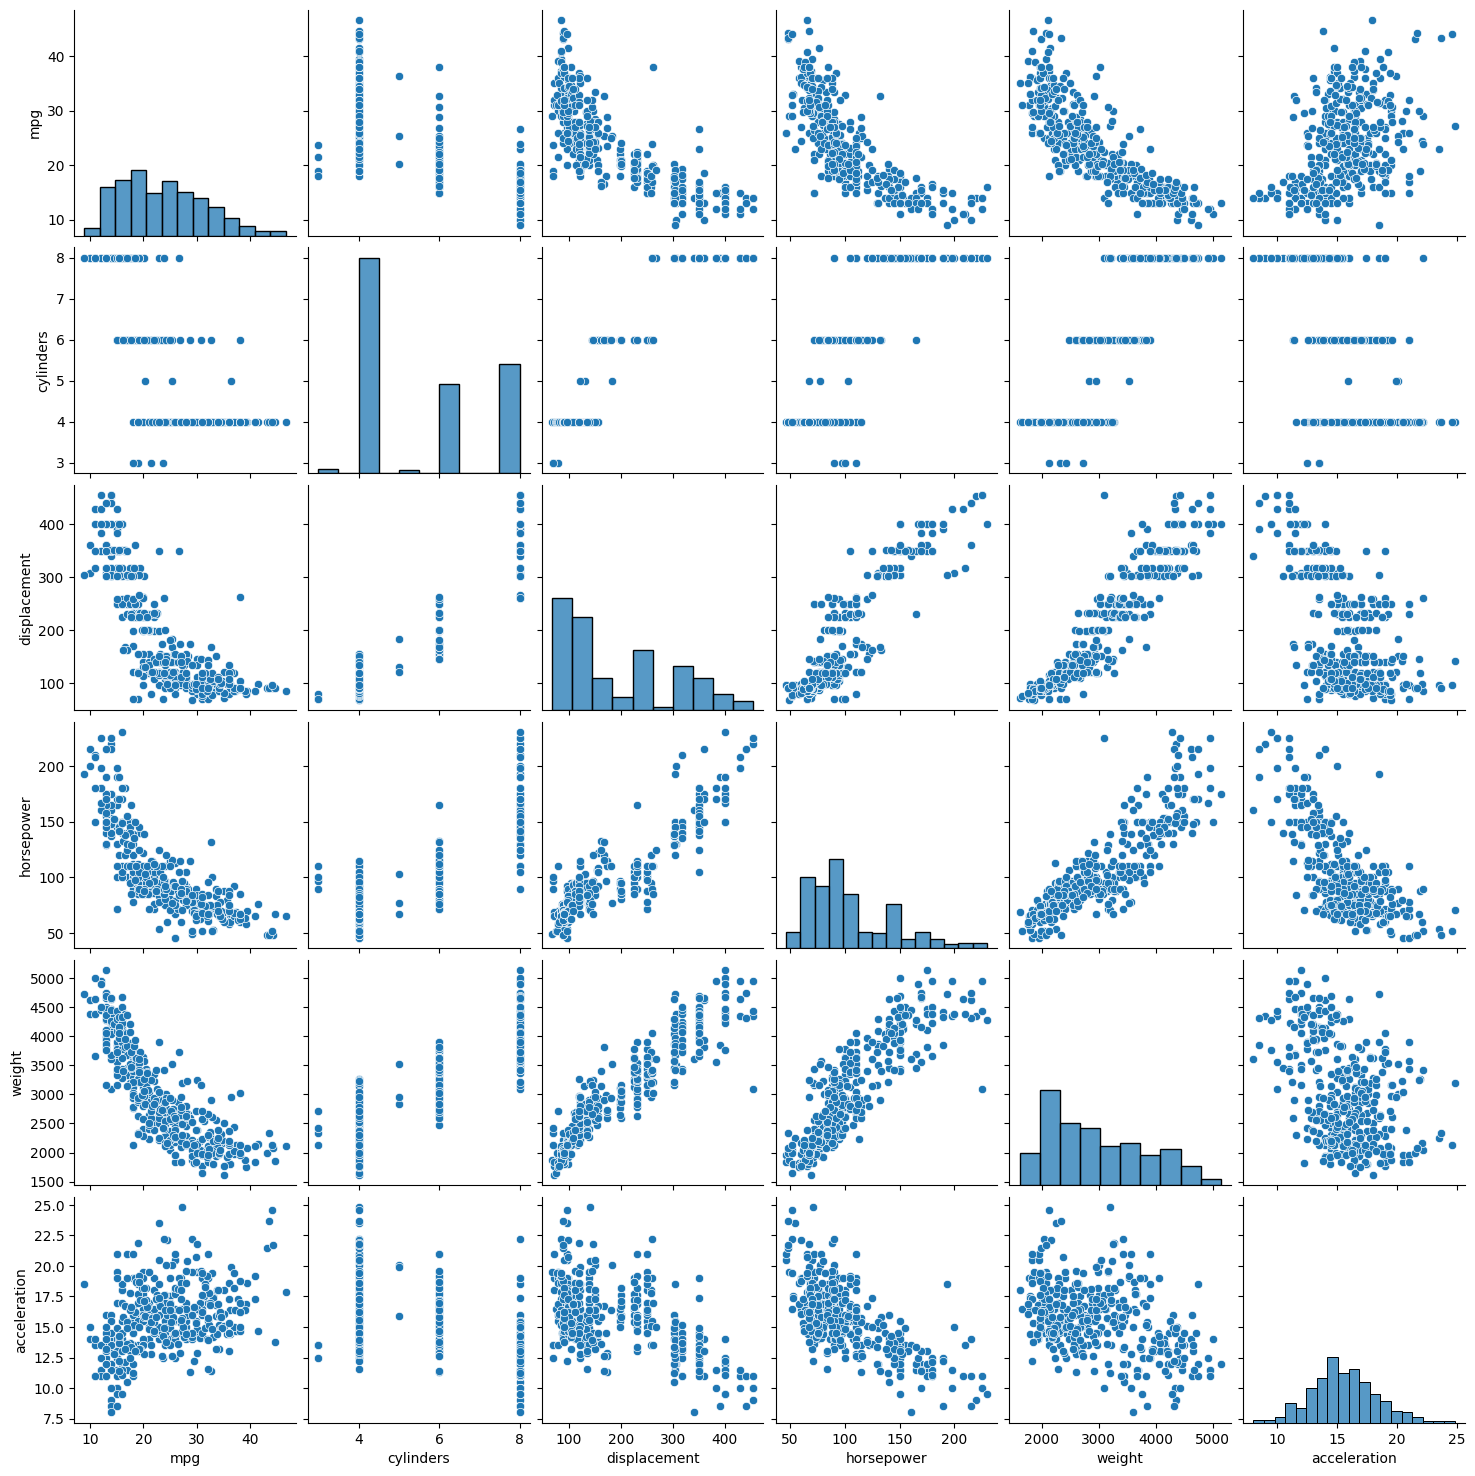

In [ ]:
# Pair plot of numerical features
sns.pairplot(data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']])
plt.show()

## **Data Preprocessing**

In [ ]:
data.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
x = data[[ 'displacement', 'horsepower', 'weight','acceleration', ]]

In [ ]:
y = data['mpg']

In [ ]:
data.shape

(392, 9)

In [ ]:
x.shape

(392, 4)

In [ ]:
y.shape

(392,)

In [ ]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
categorical_cols = x.select_dtypes(include=['object']).columns

In [ ]:
x = pd.get_dummies(x, columns=categorical_cols)

In [ ]:
sc = StandardScaler()

In [ ]:
x = sc.fit_transform(x)

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2529)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((294, 4), (98, 4), (294,), (98,))

## **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

## **Model Evaluation**

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

23.464404729340036

In [ ]:
model.coef_

array([-0.82134735, -2.00007128, -4.12715281, -0.16529152])

**Mileage = 23.45 -0.82displacement -2.00horsepower -4.12weight
-0.165acceleration +error**

## **Prediction**

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([18.45029029, 15.11872575, 14.25951901, 23.63777162, 29.77227939,
       23.78289678, 26.46274613, 24.63477759, 15.10361067, 11.92089347,
       24.03667612, 28.03774179, 31.7791986 , 31.04942136, 18.34939414,
       19.34562679, 28.14901371, 32.26833498, 31.23336778, 27.1706607 ,
       18.90264044, 22.69158865, 26.30616149, 32.53334114, 20.7455229 ,
        8.43604922, 21.96939005, 18.16644283, 24.9187207 , 14.95041612,
       23.27573018, 17.10008397,  9.28416594, 30.02859334, 20.49341373,
       29.16402497, 24.1851619 , 21.82468561, 10.45764414, 12.99758931,
       21.55287965, 19.9763373 ,  5.81701795, 17.83479167, 22.69872144,
       29.39987303, 13.2638446 , 25.84303202, 29.29886179, 22.44116443,
       22.30857618, 16.57432268, 24.06827363, 30.19019859, 10.04817173,
        9.3533171 , 28.14495274, 23.67665202, 20.07936568, 30.77322956,
       20.95405256, 26.72684739, 23.16157669, 14.10789682, 24.37223149,
       26.84731155, 15.26437637, 24.21355   , 30.81705563, 14.86

**Accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,r2_score

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.14486145216628085

In [ ]:
mean_absolute_error(y_test,y_pred)

3.2128193572784176

In [ ]:
r2_score(y_test,y_pred)

0.7174961864188241

## **Explaination**

The model captures a significant portion of the variance in mileage, as reflected by the
𝑅^2 score of 0.7175
The error metrics (MAPE and MAE) show that the model has a reasonable level of predictive accuracy.
The model is generally effective at predicting vehicle mileage, explaining a significant portion of the variance with moderate error. However, further refinement could enhance its accuracy and reliability.